<a href="https://colab.research.google.com/github/inputJun/MachineLearning-Study/blob/main/2022%EB%85%841%ED%95%99%EA%B8%B0%EB%93%9C%EB%A1%A0%EA%B3%BC%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_201700846%EA%B3%A0%EC%A4%80%ED%99%98_Knn%EC%97%90%EC%84%9C_N%EC%9D%98%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**201700846 고준환**

**회전익 기체 제원 데이터 받아오기**
- MultiCopter.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Drone_multi = pd.read_csv("MultiCopter.csv")
Drone_multi.head()

,Company,Name,Length,Width,Height,Weight
0,DJI,MAVIC 2 ZOOM,322.0,242.0,84.0,905
1,DJI,MAVIC 2 PRO,322.0,242.0,84.0,907
2,DJI,PHANTOM 4 PRO,289.5,289.5,196.0,1375
3,DJI,SPARK,143.0,143.0,55.0,300
4,DJI,INSPIRE 2,427.0,317.0,425.0,3440


In [ ]:
Drone_multi.columns

Index(['Company', 'Name', 'Length', 'Width', 'Height', 'Weight'], dtype='object')

**csv 파일에서 회전익의 전장(Length), 무게(Weight)값을 추출한 후 리스트 생성**

회전익의 전장

In [ ]:
multi_length_list = []
for i in Drone_multi["Length"] :
  multi_length_list.append(i)
print(multi_length_list)

[322.0, 322.0, 289.5, 143.0, 427.0, 1460.0, 400.0, 1940.0, 1860.0, 365.0, 1974.0, 1590.0, 730.0, 1002.0, 204.0, 305.0, 159.0, 1800.0, 860.0, 1140.0, 1225.0, 350.0, 1000.0, 1100.0, 643.0, 535.0, 330.0, 1000.0, 360.0, 2123.0]


회전익의 무게

In [ ]:
multi_weight_list = []
for i in Drone_multi["Weight"] :
  multi_weight_list.append(i)
print(multi_weight_list)

[905, 907, 1375, 300, 3440, 9700, 147, 14900, 17100, 992, 18320, 18500, 1434, 5500, 790, 945, 249, 13800, 9700, 9400, 15000, 1400, 13100, 13500, 5250, 7600, 1200, 10200, 850, 18800]


**넘파이 배열로 전환**

In [ ]:
multi_length = np.array(multi_length_list)
multi_weight = np.array(multi_weight_list)

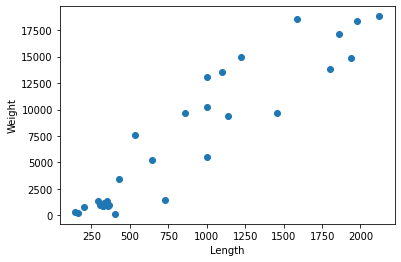

In [ ]:
plt.scatter(multi_length, multi_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    multi_length, multi_weight, random_state=14)

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

**k-최근접 이웃 회귀 알고리즘**

결정계수 R^2

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
print(knr.score(test_input, test_target))

0.7297271813416972


테스트 세트에 대한 평균 절댓값 오차

In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

1872.7250000000001


In [ ]:
print(knr.score(train_input, train_target))

0.8873093256619673


**이웃 n값을 변경했을 때 훈련/테스트 세트의 R^2 점수**

In [ ]:
for i in range (1,23) :
  knr.n_neighbors = i
  knr.fit(train_input, train_target)
  print('n_neighbors =',i)
  print(knr.score(train_input, train_target),knr.score(test_input, test_target),'\n')

n_neighbors = 1
1.0 0.4283833176346674 

n_neighbors = 2
0.9042915370889514 0.8629879194058767 

n_neighbors = 3
0.8788339866688154 0.7181441518059515 

n_neighbors = 4
0.891377553867274 0.7285477938993534 

n_neighbors = 5
0.8873093256619673 0.7297271813416972 

n_neighbors = 6
0.8778932957197059 0.7696010608540762 

n_neighbors = 7
0.8762729876365571 0.7023051967160046 

n_neighbors = 8
0.8690152892750276 0.6815148581397783 

n_neighbors = 9
0.869684838630752 0.6520167438707906 

n_neighbors = 10
0.8459958458633505 0.6375245379470718 

n_neighbors = 11
0.830830079381431 0.6154432991061305 

n_neighbors = 12
0.7713228742842071 0.6157614052243114 

n_neighbors = 13
0.7293138364786868 0.5636815437563215 

n_neighbors = 14
0.6598564147749788 0.5066241244337504 

n_neighbors = 15
0.599801115366545 0.42648183760286296 

n_neighbors = 16
0.5283841674877208 0.3421059655813712 

n_neighbors = 17
0.4310299683065828 0.28300006020454327 

n_neighbors = 18
0.35271826709209064 0.1966051609433811 


위의 결과값으로 보았을 때 **최적의 이웃 n값은 2**임을 알 수 있다.

이웃 n값이 2일 때
훈련 세트의 R^2 값 : 0.9042915370889514

테스트 세트의 R^2 값 : 0.8629879194058767


하지만 가장 최적의 n값을 대입해도 과소적합이 발생하는 것을 보아 위의 값은 k-최근접 이웃 회귀 알고리즘을 이용했을 때 오차가 발생할 수 밖에 없는 형태임을 알 수 있다.

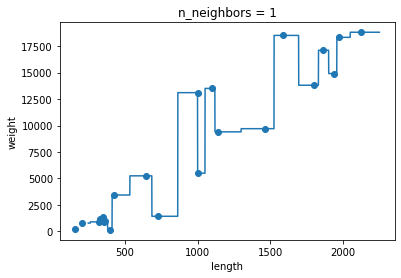

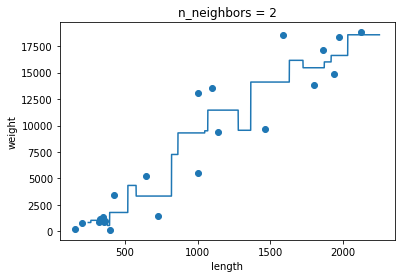

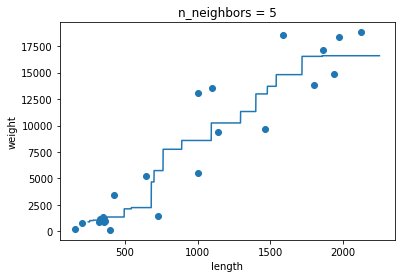

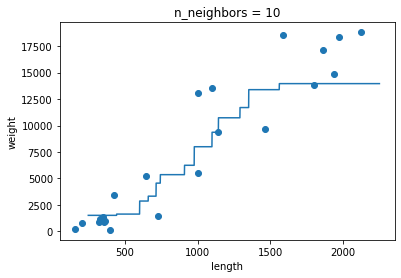

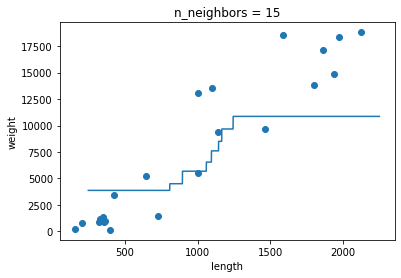

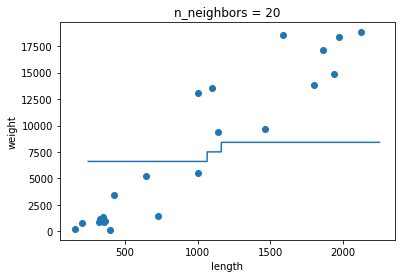

In [ ]:
knr = KNeighborsRegressor()

x = np.arange(250, 2250).reshape(-1, 1)

for n in [1,2,5,10,15,20]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()